<a href="https://colab.research.google.com/github/aquangnguyen1992/tensorflow_colab/blob/mnist_max/mnist_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import data from Google Drive and setup the workspace***

In [1]:
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree('/content/drive/My Drive/MNIST','/content/MNIST')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/MNIST'

In [1]:
train_data_path = '/content/MNIST/train_max_x'
test_data_path = '/content/MNIST/test_max_x'
label_file = '/content/MNIST/train_max_y.csv'

# ***Read the dataset and show an example***

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = pd.read_pickle(train_data_path).astype(np.uint8)
#test_data = pd.read_pickle(test_data_path)
train_label = pd.read_csv(label_file)
y = train_label['Label']

In [3]:
dataset = dataset/255.0
#test_data = test_data/255.0
number_of_label = np.unique(np.array(y), return_counts=True)
#X_train, X_test, Y_train, Y_test = train_test_split(dataset, y, test_size=0.2, random_state=100)
test_size = 0.8
X_train = dataset[:int(test_size*len(dataset))]
X_test = dataset[int(test_size*len(dataset)):]
Y_train = np.array(y)[:int(test_size*len(dataset))]
Y_test = np.array(y)[int(test_size*len(dataset)):]

9 [0.16470588 0.03137255 0.         0.48235294 0.49019608 0.42745098
 0.42352941 0.2745098  0.         0.45098039 0.49803922 0.21568627
 0.36078431 0.4        0.12156863 0.18431373 0.48235294 0.57254902
 0.60784314 0.54509804 0.60784314 0.55294118 0.19607843 0.52156863
 0.53333333 0.54509804 0.56862745 0.54117647 0.23529412 0.02352941
 0.06666667 0.60392157 0.58039216 0.51372549 0.45490196 0.4
 0.29803922 0.23137255 0.17254902 0.         0.36470588 0.43921569
 0.43921569 0.41176471 0.73333333 0.5254902  0.51764706 0.56862745
 0.52941176 0.52941176 0.50196078 0.39215686 0.10196078 0.21960784
 0.49019608 0.36470588 0.45098039 0.62745098 0.52941176 0.52941176
 0.52941176 0.50980392 0.6        0.59607843 0.57254902 0.61568627
 0.56078431 0.53333333 0.4745098  0.45490196 0.41960784 0.43529412
 0.41176471 0.49411765 0.49803922 0.50588235 0.56862745 0.52941176
 0.36078431 0.23529412 0.35686275 0.19607843 0.41568627 0.14901961
 0.50980392 0.47058824 0.50588235 0.65098039 0.58431373 0.61176471


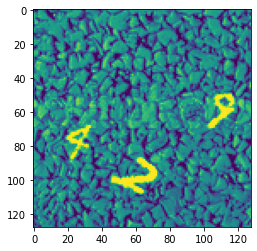

In [4]:
i = np.random.randint(0, X_train.shape[0])
sample = X_train[i]
print(Y_train[i], sample[0])
plt.imshow(sample)

(40000, 128, 128, 1) (10000, 128, 128, 1)


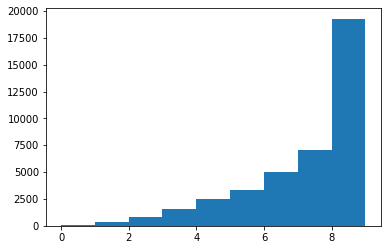

In [5]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

print(X_train.shape, X_test.shape)
plt.hist(np.array(Y_train), bins=range(len(number_of_label[0])))
number_of_label[0]

b = np.zeros((Y_train.size, Y_train.max()+1))
b[np.arange(Y_train.size),Y_train] = 1
Y_train = b

b = np.zeros((Y_test.size, Y_test.max()+1))
b[np.arange(Y_test.size),Y_test] = 1
Y_test = b

# ***Keras Solution***

In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam

In [7]:
def create_model(conv2d_1=32, str_1=1, conv2d_2=32, str_2=1, dense_node=32, dr=0.0):
  my_model = Sequential()
  my_model.add(Conv2D(conv2d_1, kernel_size=(3,3), strides=(str_1, str_1), activation='relu', batch_input_shape=(None, X_train.shape[1], X_train.shape[2], X_train.shape[3])))
  my_model.add(Conv2D(conv2d_1, kernel_size=(3,3), activation='relu'))
  my_model.add(Flatten())
  my_model.add(Dropout(dr))
  my_model.add(BatchNormalization())
  my_model.add(Dense(dense_node, activation='relu'))
  my_model.add(Dense(len(number_of_label[0]), activation='relu'))

  optimizer = Adam(lr=0.0001, amsgrad=True)
  
  my_model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return my_model

In [8]:
BATCH = 32
my_model = create_model(conv2d_1=32, str_1=3, conv2d_2=32, str_2=1, dense_node=32, dr=0.0)
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 42, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dropout (Dropout)            (None, 51200)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 51200)             204800    
_________________________________________________________________
dense (Dense)                (None, 32)                1638432   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)
filepath="weight_model_cnn_best.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', save_weights_only=False, verbose=1, save_best_only=True, mode='max')


history = my_model.fit(
  X_train, Y_train,
  epochs=300, validation_split = 0.2, verbose=1,
  batch_size = BATCH,
  callbacks=[early_stop, checkpoint])

Epoch 1/300
